In [0]:
from google.colab import files
uploaded = files.upload()

Saving EN-FINAL Table 9.pdf to EN-FINAL Table 9 (2).pdf


Shareable link: https://colab.research.google.com/drive/1Qm7_N-UzV9E7QucywjfI2A_fpKWYXm3v



---



Using pdftables Library to extract tables

Source: Jacqueline Kazil, Katherine Jarmul - Data Wrangling with Python (Ch.5)

In [0]:
# install libraries
pip install pdftables

In [0]:
pip install requests

In [0]:
from pdftables import get_tables
import pprint

In [0]:
# The get_tables function return each pages as its own table
# Each of those tables has a list ofrows with a contained list of columns
all_tables = get_tables(open('EN-FINAL Table 9.pdf', 'rb'))

In [0]:
# Tying to find the titles we can use for our columns
# Here we are looking at the first page's first 6 rows
print all_tables[0][:6]

# NOTE: we can see that the titles are included in the first 3 list and they are messy

[[u'TABLE 9    C', u'HILD', u'PROT', u'ECTIO', u'N', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'TA'], [u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'BL'], [u'', u'', u'', u'', u'', u'', u'Birth', u'Female', u'genital mutila', u'tion/cutting (%)+', u'Jus', u'tification of', u'', u'', u'E'], [u'', u'', u'Child labour (%', u')+', u'Child m', u'arriage (%)', u'registration', u'', u'2002\u201320', u'12*', u'wife', u'beating (%)', u'', u'Violent disciplin', u'e (%)+ 9'], [u'Countries  and areas', u'total', u'2005\u20132012*male', u'female', u'2005married by 15', u'\u20132012*married by 18', u'(%)+ 2005\u20132012*total', u'prwomena', u'evalencegirlsb', u'attitudessupport for thepracticec', u'2male', u'005\u20132012*female', u'total', u'2005\u20132012*male', u'female'], [u'Afghanistan', u'10', u'11', u'10', u'15', u'40', u'37', u'\u2013', u'\u2013', u'\u2013', u'\u2013', u'90', u'74', u'75', u'74']]


In [0]:
# Manually settting up our titles
# So we add all of our headers, including the country names, to one list
headers = ['Country', 'Child Labor 2005-2012 (%) total',
           'Child Labor 2005-2012 (%) male',
           'Child Labor 2005-2012 (%) female',
           'Child Marriage 2005-2012 (%) married by 15',
           'Child Marriage 2005-2012 (%) married by 18',
           'Birth registration 2005-2012 (%)',
           'Female Genital mutilation 2002-2012 (prevalence), women',
           'Female Genital mutilation 2002-2012 (prevalence), girls',
           'Female Genital mutilation 2002-2012 (support)',
           'Justification of wife beating 2005-2012 (%) male',
           'Justification of wife beating 2005-2012 (%) female',
           'Violent discipline 2005-2012 (%) total',
           'Violent discipline 2005-2012 (%) male',
           'Violent discipline 2005-2012 (%) female']


In [0]:
# extract the data values from the pdf 
first_name = False
final_data = []

for table in all_tables:
    
    # isolates only the rows for each page we want; slice from the 5th index onward
    for row in table[5:]:
    
        # if data row is missing index 0, it has no country name and is a blank row
        # skip this row using continue
        if row[0] == '' or row[0][0].isdigit():
            continue
        
        # if the data row is missing index 2, we know this is probably the first part of a country name
        # We saves the first part of the name in a variable first_name
        elif row[2] == '':
            first_name = row[0]
            continue
        
        # Manipulate the country name entry in the row if it has a first_name
        # Put the second part of a country name back together with the first name
        if first_name:
            row[0] = u'{} {}'.format(first_name, row[0])
            
            # set first_name back to False, so our nexxt iteration operates properly
            first_name = False
            
        # Before cleaning up the messy data...
        # Note there are in unicode
        # print(row)
           
        clean_row = []
        # clean the data value in each row
        # strip away the non-numeric letter next to the numeric data in each column such as 'x', 'y', 'v', or x,y'
        # also change the unicode representation of '-' into an empty string
        for col in range(0, len(row)):
              
          # Translate the value from unicode to ascii and do not need to transalte the non-ASCII chars
          # store the data values into the variable clean_row
          # https://stackoverflow.com/questions/2365411/convert-unicode-to-ascii-without-errors-in-python/35536228
          clean_row.append(row[col].encode('ascii', 'ignore'))
          
          # Then clean up the data values
          # strip away the non-numeric letter next to the numeric value
          clean_row[col] = clean_row[col].strip('x')
          clean_row[col] = clean_row[col].strip('y')
          clean_row[col] = clean_row[col].strip('v')
          clean_row[col] = clean_row[col].strip('x,y')
          
          # convert the numeric data for each row to integer
          if clean_row[col].isdigit():
              clean_row[col] = eval(clean_row[col])
              # print(type(clean_row[col]))
          elif clean_row[col] == ' ':
              clean_row[col] = None
          
        # print(clean_row)
          
        # append all the cleaned row into the list final_data
        final_data.append(clean_row)

        # Exit the loop when you reach the last data row
        if row[0] == 'Zimbabwe':
             break

In [0]:
# prints out a list of each row in the table
pprint.pprint(final_data)

[['Afghanistan', 10, 11, 10, 15, 40, 37, '', '', '', '', 90, 74, 75, 74],
 ['Albania', 12, 14, 9, 0, 10, 99, '', '', '', 36, 30, 75, 78, 71],
 ['Algeria', '5 ', '6 ', '4 ', 0, 2, 99, '', '', '', '', 68, 88, 89, 87],
 ['Andorra', '', '', '', '', '', '100 ', '', '', '', '', '', '', '', ''],
 ['Angola',
  '24 ',
  '22 ',
  '25 ',
  '',
  '',
  '36 ',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['Antigua and Barbuda',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['Argentina',
  '7 ',
  '8 ',
  '5 ',
  '',
  '',
  '99 ',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['Armenia', 4, 5, 3, 0, 7, 100, '', '', '', 20, 9, 70, 72, 67],
 ['Australia', '', '', '', '', '', '100 ', '', '', '', '', '', '', '', ''],
 ['Austria', '', '', '', '', '', '100 ', '', '', '', '', '', '', '', ''],
 ['Azerbaijan', '7 ', '8 ', '5 ', 1, 12, 94, '', '', '', 58, 49, 75, 79, 71],
 ['Bahamas', '', '', '', '', '', '', '', '', '', '', '', '', '', ''],
 ['Bahrain', '5 ', 

In [0]:
# checking the type of the data 
# type(final_data)
# type(final_data)
type(final_data[0])
# type(final_data[0][3])


list

In [0]:
import pandas as pd

In [0]:
# convert the list of dict into a dataframe and set the 'Country' column as the index
df = pd.DataFrame(final_data, columns = headers)
df = df.set_index('Country')
df = df.apply(pd.to_numeric)
# df.columns
df

Child Labor 2005-2012 (%) total  \
Country                                                                      
Afghanistan                                                           10.0   
Albania                                                               12.0   
Algeria                                                                5.0   
Andorra                                                                NaN   
Angola                                                                24.0   
Antigua and Barbuda                                                    NaN   
Argentina                                                              7.0   
Armenia                                                                4.0   
Australia                                                              NaN   
Austria                                                                NaN   
Azerbaijan                                                             7.0   
Bahamas                                                                NaN   
Bahrain                                                                5.0   
Bangladesh                                                            13.0   
Barbados                                                               NaN   
Belarus                                                                1.0   
Belgium                                                                NaN   
Belize                                                                 6.0   
Benin                                                                 46.0   
Bhutan                                                                 3.0   
Bolivia (Plurinational State of)                                      26.0   
Bosnia and Herzegovina                                                 5.0   
Botswana                                                               9.0   
Brazil                                                                 9.0   
Brunei Darussalam                                                      NaN   
Bulgaria                                                               NaN   
Burkina Faso                                                          39.0   
Burundi                                                               26.0   
Cabo Verde                                                             3.0   
Cambodia                                                              36.0   
...                                                                    ...   
Suriname                                                               4.0   
Swaziland                                                              7.0   
Sweden                                                                 NaN   
Switzerland                                                            NaN   
Syrian Arab Republic                                                   4.0   
Tajikistan                                                            10.0   
Thailand                                                               8.0   
The former Yugoslav Republic of Macedonia                             13.0   
Timor-Leste                                                            4.0   
Togo                                                                  28.0   
Tonga                                                                  NaN   
Trinidad and Tobago                                                    1.0   
Tunisia                                                                2.0   
Turke                                                                  3.0   
Turkmenistan                                                           NaN   
Tuvalu                                                                 NaN   
Uganda                                                                25.0   
Ukraine                                                                7.0   
United Arab Emirates                                             

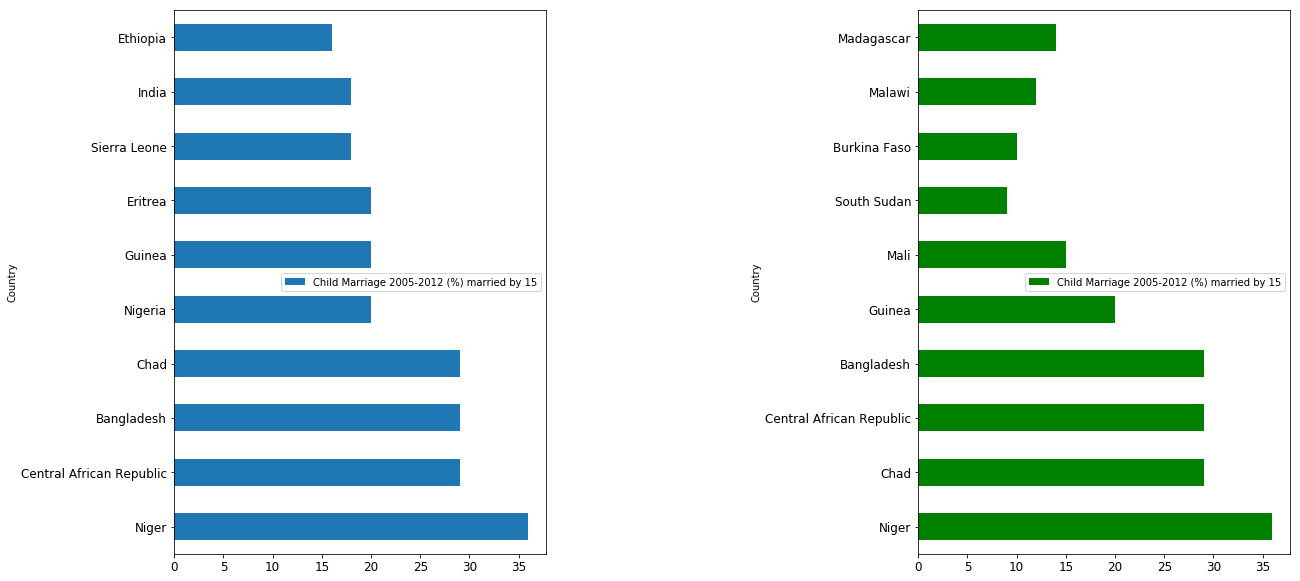

In [0]:
import matplotlib.pyplot as plt

# Find the country with the highest % of child marriage in 2005-2012 of age 15 and 18

fig, axes = plt.subplots(nrows = 1, ncols = 2)

# adjust the space between the 2 plots; set it a little more farther apart
plt.subplots_adjust(wspace = 1)

# Sort the dataframe according to its % of child marriage by age 15 and 18; the highest % will be at the top
# store these into a new variable
df_1 = df.sort_values('Child Marriage 2005-2012 (%) married by 15', ascending = False)
# df_1
df_2 = df.sort_values('Child Marriage 2005-2012 (%) married by 18', ascending = False)
# df_2

# Looking at the data, it seems like Niger the highest % of Child Marriage in 2005-2012 for both age 15 and 18
df_1.head(10).plot(ax = axes[0], kind = 'barh', y = ['Child Marriage 2005-2012 (%) married by 15'], fontsize = 12)
df_2.head(10).plot(color = 'g', ax = axes[1], kind = 'barh', y = ['Child Marriage 2005-2012 (%) married by 15'], fontsize = 12, figsize = (20,10))


In [0]:
# Convert the dataframe to csv
df.to_csv('table_9.csv')



---



Using PyPDF2 Library

https://www.geeksforgeeks.org/working-with-pdf-files-in-python/

In [0]:
# Installation
pip install PyPDF2

In [0]:
# Extracting text from PDF file

In [0]:
import PyPDF2

In [0]:
# creating a pdf file object
# open the pdf in binary mode
pdfObj = open('EN-FINAL Table 9.pdf', 'rb')

In [0]:
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfObj)

In [0]:
# get the number of pages in the pdf
print(pdfReader.numPages)

6


In [0]:
# extract the table from each pages 
# results will be a list of unicode strings
# each string incoporated all the info of 1 page
page = 0
texts = []
while page in range(0, pdfReader.numPages):
    pageObj = pdfReader.getPage(page)
    text = pageObj.extractText()
    texts.append(text)
    page = page + 1

In [0]:
# type(texts[0])
# type(text)

# should print an error
#print(texts[6])

# print the info of the 1st page
# NOTE: 'CE' reperesents the '-' in the table
print(texts[0])

TABLE 9
Afghanistan 10  11  10  
15  
40  
37  
Œ  
Œ  Œ  Œ  90  
74  75  74Albania 12  14  9  
0  
10  
99  
Œ  
Œ  Œ  36  30  
75  78  71Algeria 5 y 6 y 4 y 0  
2  
99  
Œ  
Œ  Œ  Œ  68  
88  89  87Andorra Œ   Œ  Œ  
Œ  
Œ  
100 v Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒAngola 24 x 22 x 25 x Œ  
Œ  
36 x Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒAntigua and Barbuda
 Œ   Œ   Œ   
 Œ  
Œ  
Œ  
Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒArgentina 7 y 8 y 5 y Œ  
Œ  
99 y Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒArmenia 4  5  3  
0  
7  
100  
Œ  
Œ  Œ  20  9  
70  72  67Australia Œ   Œ   Œ   
 Œ  
Œ  
100 v Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒAustria Œ   Œ   Œ   
 Œ  
Œ  
100 v Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒAzerbaijan 7 y 8 y 5 y 1  
12  
94  
Œ  
Œ  Œ  58  49  
75  79  71Bahamas Œ   Œ   Œ   
 Œ  
Œ  
Œ  
Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒBahrain 5 x 6 x 3 x Œ  
Œ  
Œ  
Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒBangladesh 13   
 18   
 8   
 29  
65  
31  
Œ  
Œ  Œ  Œ  33 y Œ  Œ  ŒBarbados Œ   Œ   Œ   
 Œ  
Œ  
Œ  
Œ  
Œ  Œ  Œ  Œ  
Œ  Œ  ŒBelarus 1   
 1   
 2   
 0  
3  
100 y Œ  
Œ  Œ  4  4  
65 y 

In [0]:
# closing the pdf file object
pdfObj.close()

In [0]:
# Rotating PDF pages

In [0]:
# A function for rotating the page
def PDFrotate(origFileName, newFileName, rotation): 
  
    # creating a pdf File object of original pdf 
    pdfFileObj = open(origFileName, 'rb') 
      
    # creating a pdf Reader object 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
    # creating a pdf writer object for new pdf 
    # rotated pages will be written to a new pdf
    pdfWriter = PyPDF2.PdfFileWriter() 
      
    # iteriate through each page of original pdf
    for page in range(pdfReader.numPages): 
  
        # creating rotated page object 
        pageObj = pdfReader.getPage(page) 
      
        # now we rotate the page by rotateClockwise() method
        pageObj.rotateClockwise(rotation) 
  
        # adding rotated page object to pdf writer 
        pdfWriter.addPage(pageObj) 
  
    # open new pdf file object 
    newFile = open(newFileName, 'wb') 
      
    # writing rotated pages to new file using write() method 
    pdfWriter.write(newFile) 
  
    # closing the original pdf file object 
    pdfFileObj.close() 
      
    # closing the new pdf file object 
    newFile.close() 

In [0]:
# Now we try to rotate the pdf 180 degrees

# original pdf file name 
origFileName = 'EN-FINAL Table 9.pdf'
     
# new pdf file name 
newFileName = 'rotated_table_9.pdf'
      
# rotation angle 
rotation = 180
      
# calling the PDFrotate function 
PDFrotate(origFileName, newFileName, rotation) 

In [0]:
# Merging PDF files

In [0]:
# A function to merge 2 pdfs together

def PDFmerge(pdfs, output):  
    # creating pdf file merger object 
    pdfMerger = PyPDF2.PdfFileMerger() 
      
    # append file object of each pdf to pdf merger object
    for pdf in pdfs: 
        with open(pdf, 'rb') as f: 
            pdfMerger.append(f) 
          
    # writing combined pdf to output pdf file 
    with open(output, 'wb') as f: 
        pdfMerger.write(f) 

In [0]:
# pdf files to merge 
pdfs = ['EN-FINAL Table 9.pdf', 'rotated_table_9.pdf'] 
     
# output pdf file name 
output  = 'combined_table.pdf'

# calling pdf merge function 
PDFmerge(pdfs = pdfs, output = output)

In [0]:
# Splitting PDF file

In [0]:
# A function to split the pdf file

def PDFsplit(pdf, splits): 
    # creating input pdf file object 
    pdfFileObj = open(pdf, 'rb') 
      
    # creating pdf reader object 
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
      
    # starting index of first slice 
    start = 0
      
    # starting index of last slice 
    end = splits[0] 
        
    for i in range(len(splits)+1): 
        # creating pdf writer object for (i+1)th split 
        pdfWriter = PyPDF2.PdfFileWriter() 
          
        # output pdf file name 
        # the str(i) is the xth number of split we are currently on
        outputpdf = pdf.split('.pdf')[0] + str(i) + '.pdf'
          
        # adding pages to pdf writer object 
        for page in range(start,end): 
            pdfWriter.addPage(pdfReader.getPage(page)) 
          
        # writing split pdf pages to pdf file 
        with open(outputpdf, "wb") as f: 
            pdfWriter.write(f) 
  
        # interchanging page split start position for next split 
        start = end 
        try: 
            # setting split end positon for next split 
            end = splits[i+1] 
        except IndexError: 
            # setting split end position for last split 
            end = pdfReader.numPages 
          
    # closing the input pdf file object 
    pdfFileObj.close() 

In [0]:
# pdf file to split 
pdf = 'EN-FINAL Table 9.pdf'
      
# split page positions 
splits = [2,4] 
      
# calling PDFsplit function to split pdf 
PDFsplit(pdf, splits)


# OUTPUT will be 3 new PDF files:
# 1st split: page 0, 1
# 2nd split: page 2, 3
# 3rd split: page 4, 5, and 6